In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv('data/model_selection.csv', index_col=0)
df = df[df['NMSE'].notna()].loc[:, ['model', 'polyn. degree', 'training time', 'NMSE', 'std NMSE']]\
    .sort_values('NMSE', ascending=False).reset_index(drop=True).round(2)
df['polyn. degree'] = pd.to_numeric(df['polyn. degree'], downcast='integer')

df

,model,polyn. degree,training time,NMSE,std NMSE
0,RandomForestRegressor(max_depth=10),1,9.74,-17.21,0.78
1,RandomForestRegressor(max_depth=10),3,256.24,-17.84,0.40
2,ExtraTreesRegressor(max_depth=10),2,24.94,-18.51,1.04
3,RandomForestRegressor(max_depth=10),2,56.06,-18.55,1.55
4,ExtraTreesRegressor(max_depth=10),3,82.30,-18.61,0.98
5,ExtraTreesRegressor(max_depth=10),1,7.36,-24.71,1.18
6,LinearRegression(),5,78.93,-84.72,3.48
7,Ridge(),6,131.26,-84.72,3.48
8,Ridge(),5,13.27,-93.18,3.35
9,LinearRegression(),4,5.77,-107.98,4.40


In [43]:
df.to_latex('data/model_selection.tex',
                  index=False,
                  float_format="%.2f",)

/tmp/ipykernel_189111/119459686.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.to_latex('data/model_selection.tex',


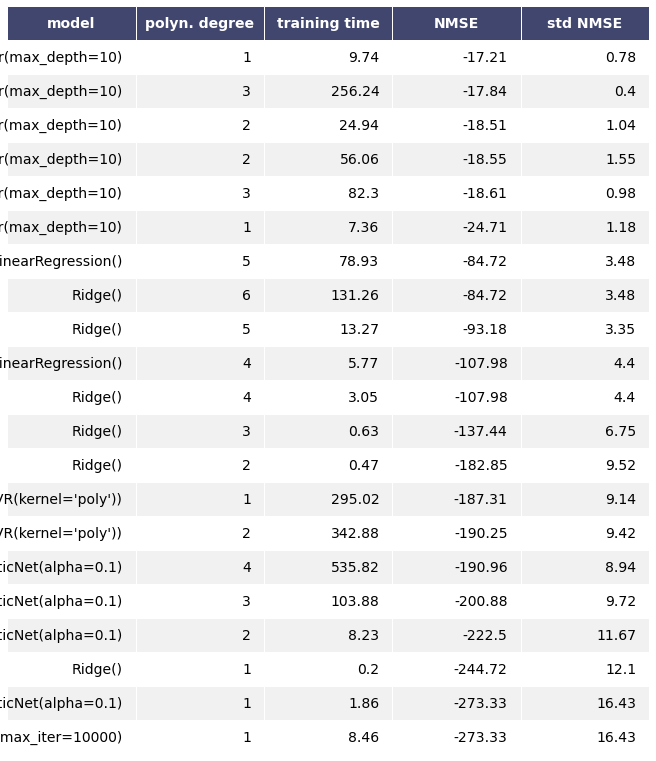

In [39]:
def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')
    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in mpl_table._cells.items():
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax.get_figure(), ax

fig,ax = render_mpl_table(df, header_columns=0, col_width=2.3)
fig.savefig("table_mpl.png")